In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as pl

In [75]:
df=pd.read_csv("D:\\EDA datasets PW skills\\dataset.csv")

In [76]:
# Check for missing values
missing_values = df.isnull().sum()

# Check data types
data_types = df.dtypes

missing_values, data_types

(GENDER                   0
 AGE                      0
 SMOKING                  0
 YELLOW_FINGERS           0
 ANXIETY                  0
 PEER_PRESSURE            0
 CHRONIC_DISEASE          0
 FATIGUE                  0
 ALLERGY                  0
 WHEEZING                 0
 ALCOHOL_CONSUMING        0
 COUGHING                 0
 SHORTNESS_OF_BREATH      0
 SWALLOWING_DIFFICULTY    0
 CHEST_PAIN               0
 LUNG_CANCER              0
 dtype: int64,
 GENDER                   object
 AGE                       int64
 SMOKING                   int64
 YELLOW_FINGERS            int64
 ANXIETY                   int64
 PEER_PRESSURE             int64
 CHRONIC_DISEASE           int64
 FATIGUE                   int64
 ALLERGY                   int64
 WHEEZING                  int64
 ALCOHOL_CONSUMING         int64
 COUGHING                  int64
 SHORTNESS_OF_BREATH       int64
 SWALLOWING_DIFFICULTY     int64
 CHEST_PAIN                int64
 LUNG_CANCER              object
 dtype: o

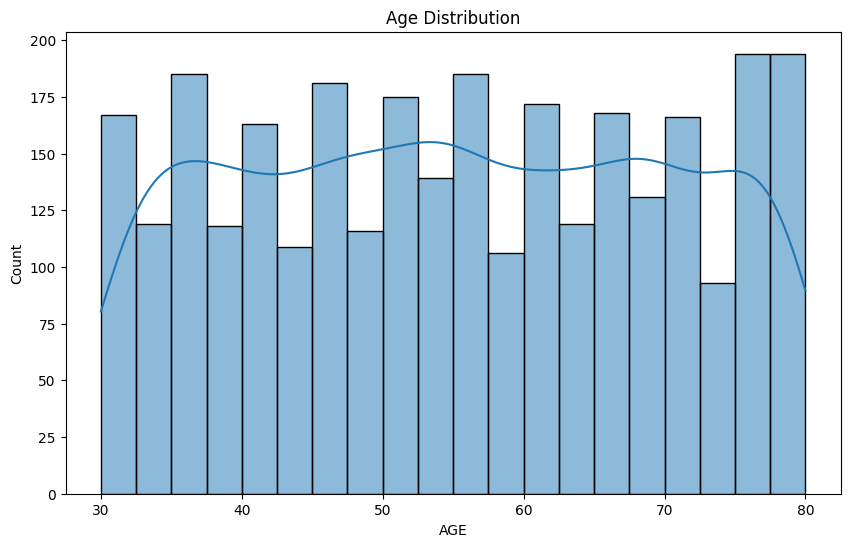

C:\Users\neela\AppData\Local\Temp\ipykernel_17752\2017328849.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




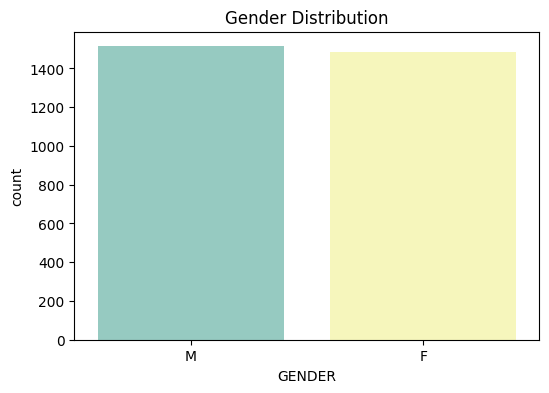

C:\Users\neela\AppData\Local\Temp\ipykernel_17752\2017328849.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




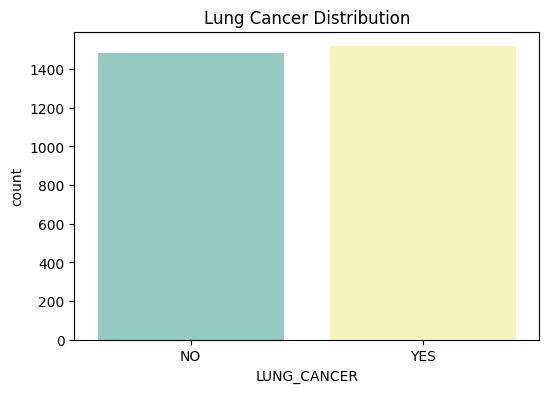

In [77]:
#UNIVARIATE ANALYSIS

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

# Distribution of Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', data=df,  palette='Set3')
plt.title('Gender Distribution')
plt.show()

# Distribution of Lung Cancer Diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=df,  palette='Set3')
plt.title('Lung Cancer Distribution')
plt.show()

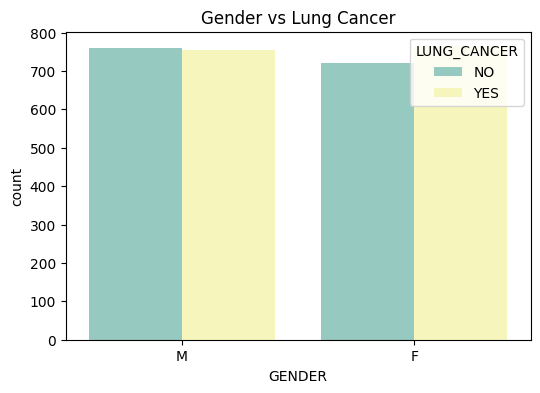

C:\Users\neela\AppData\Local\Temp\ipykernel_17752\1285743120.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




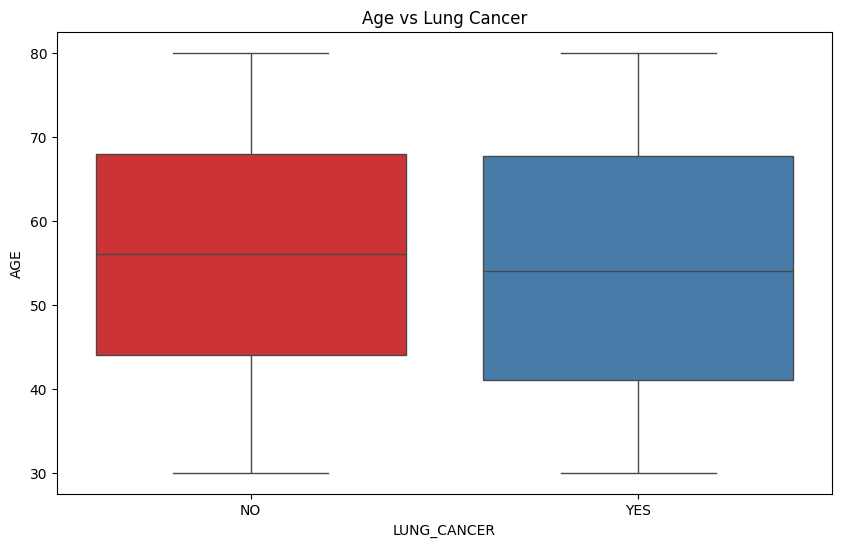

In [78]:
#BIVARIATE ANALYSIS

# Gender vs Lung Cancer
plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df, palette='Set3')
plt.title('Gender vs Lung Cancer')
plt.show()

# Age vs Lung Cancer
plt.figure(figsize=(10, 6))
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df, palette='Set1')
plt.title('Age vs Lung Cancer')
plt.show()


SMOKING    1    2
GENDER           
1        792  722
2        735  751


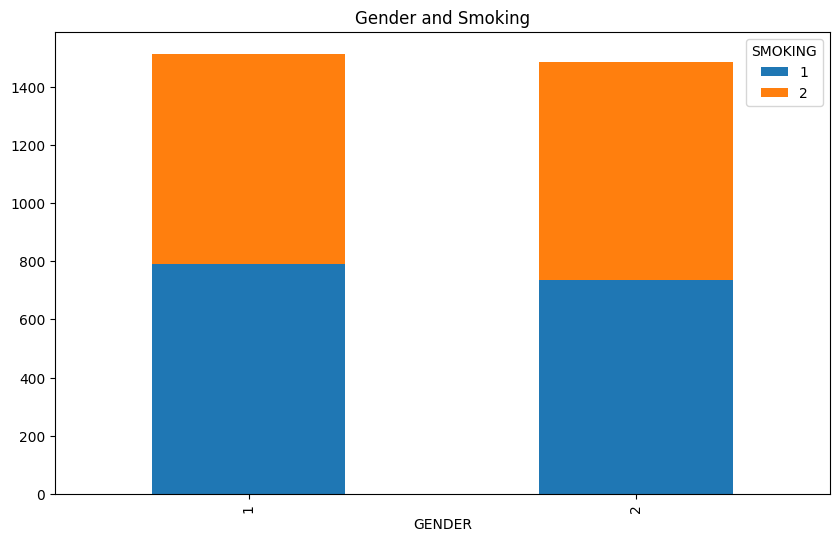

In [96]:
gender_smoking = pd.crosstab(df['GENDER'], df['SMOKING'])
print(gender_smoking)
gender_smoking.plot(kind = 'bar', stacked = True, figsize = (10, 6))
plt.title("Gender and Smoking")
plt.show()  

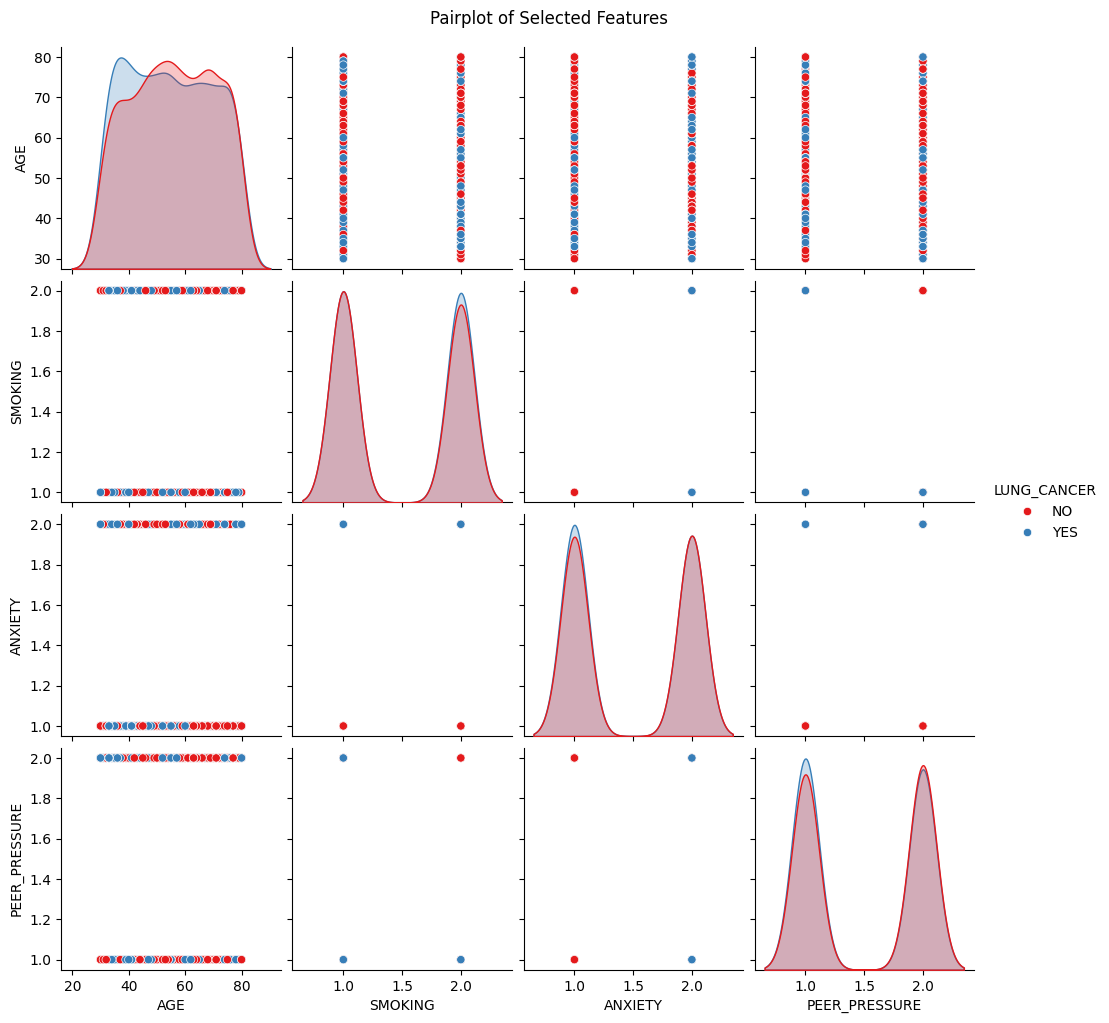

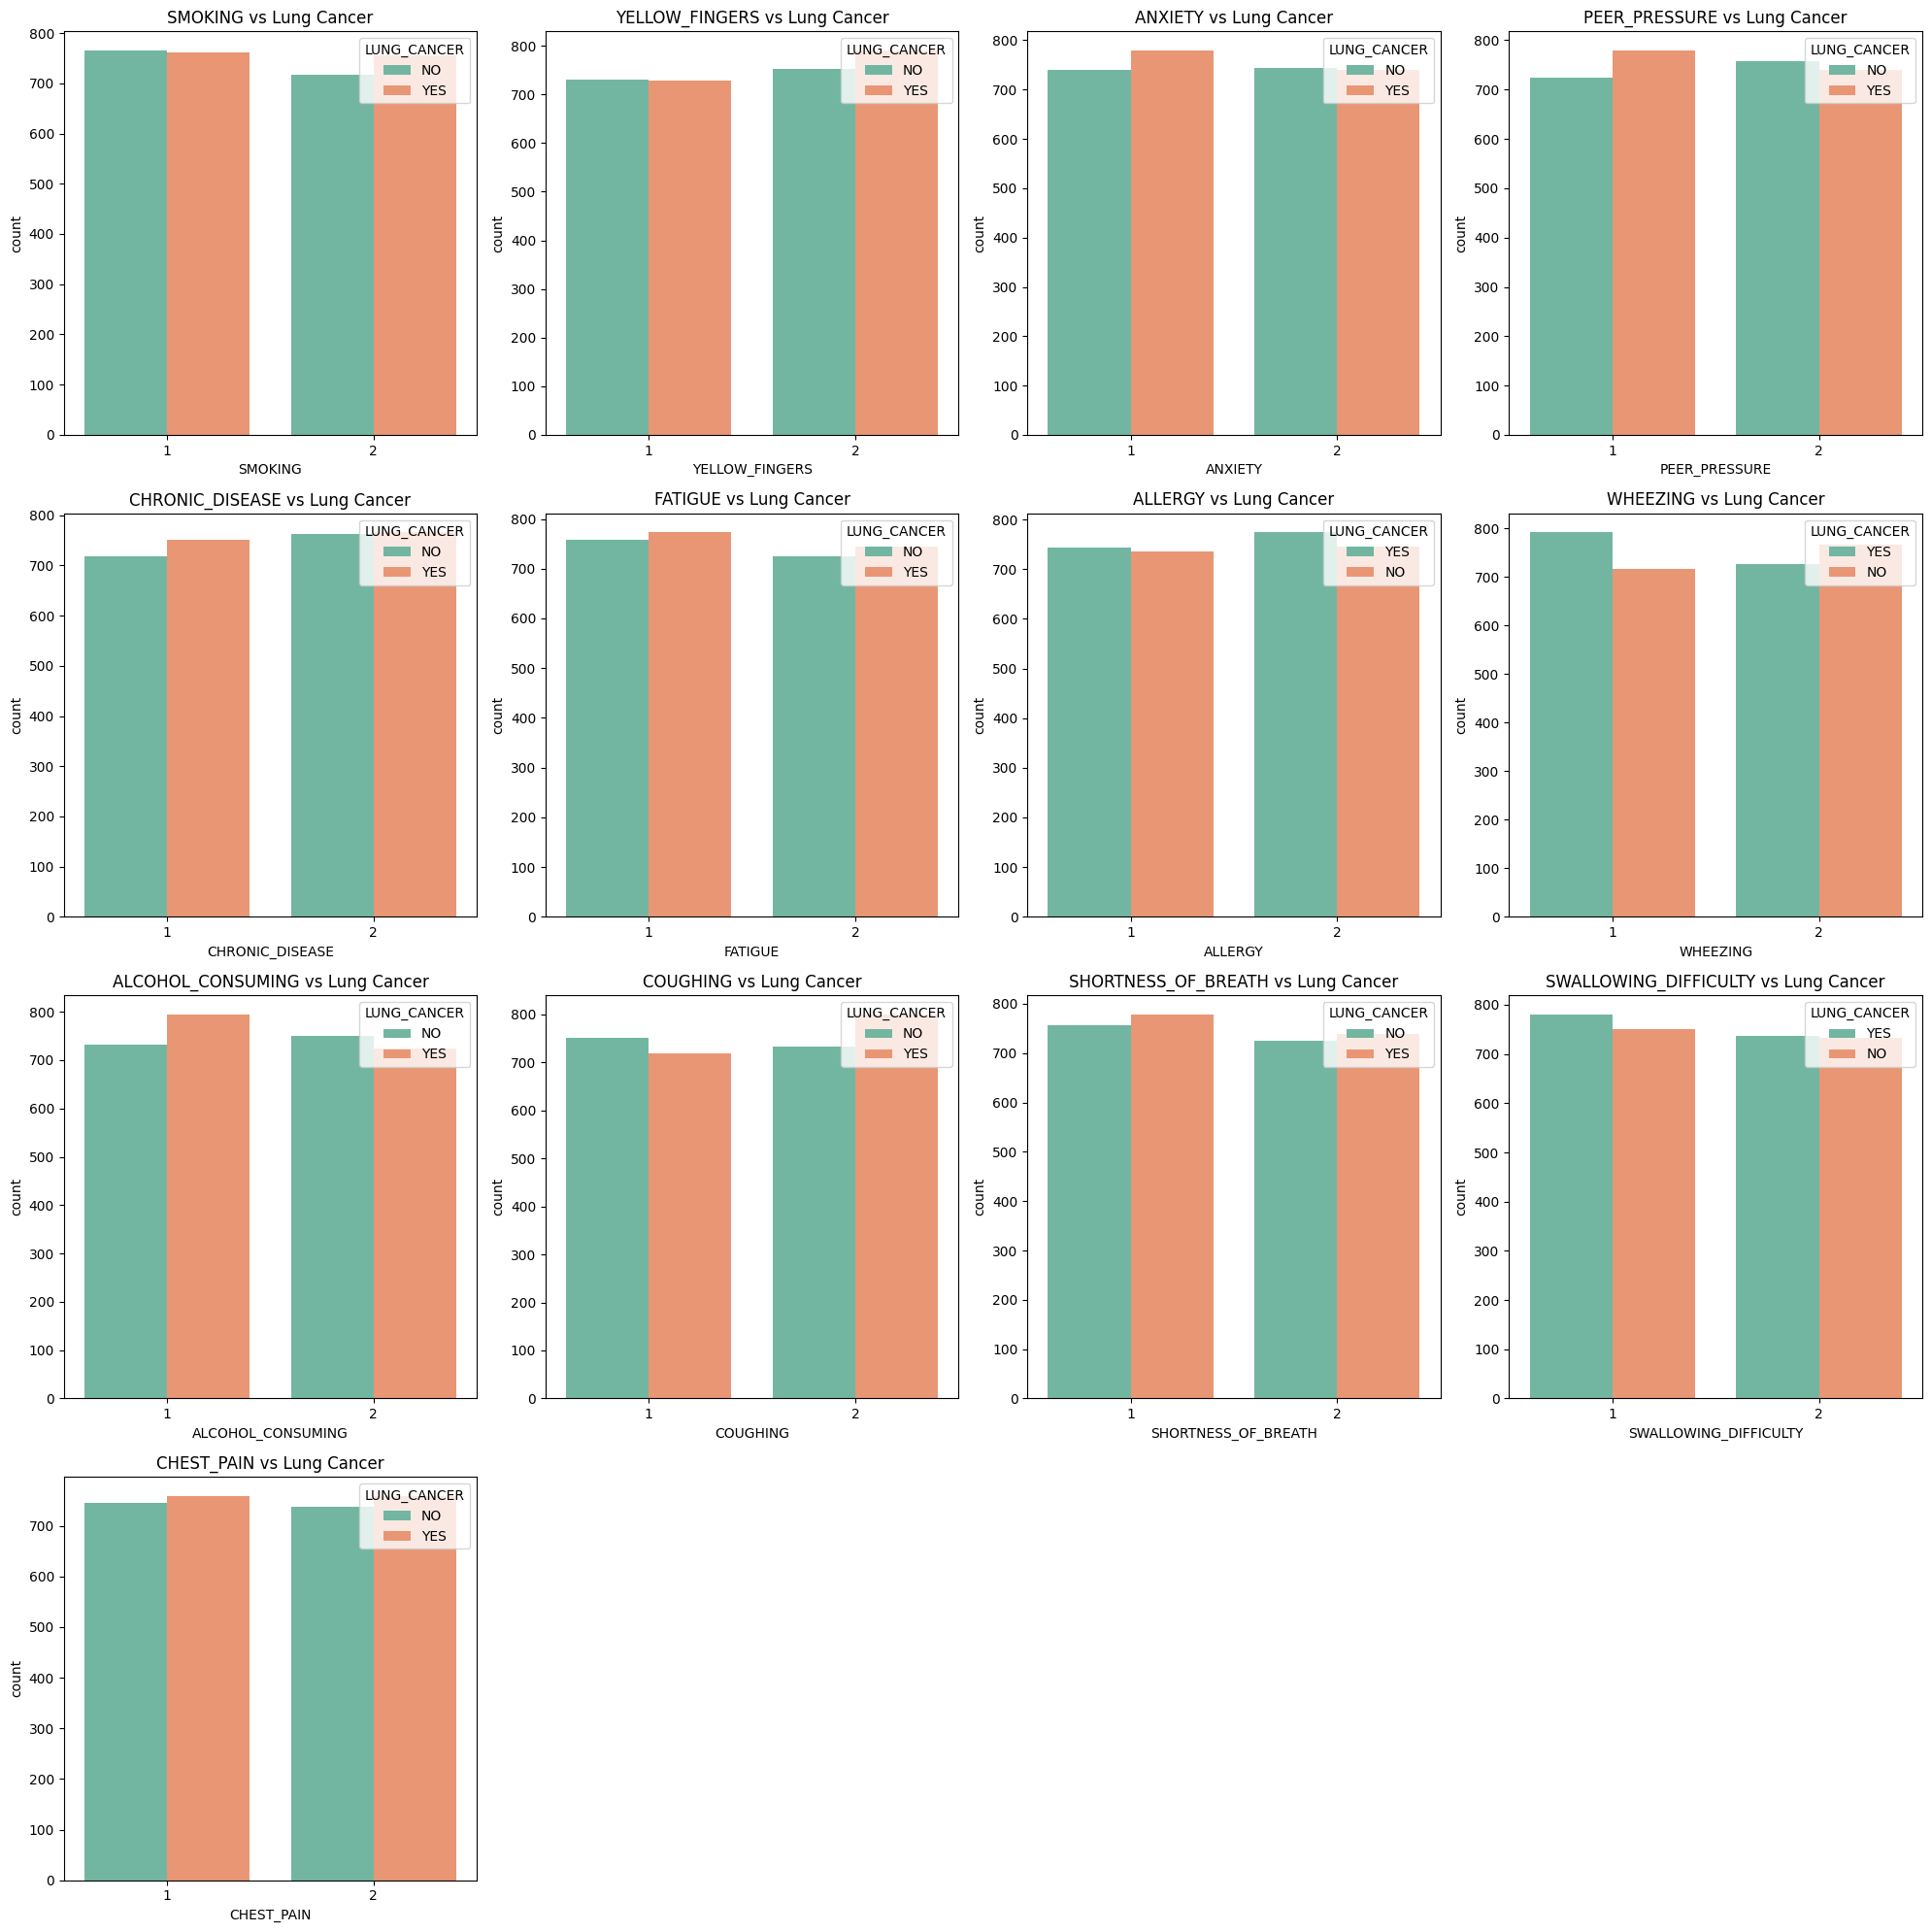

In [79]:
# Pairplot for selected features
sns.pairplot(df[['AGE', 'SMOKING', 'ANXIETY', 'PEER_PRESSURE', 'LUNG_CANCER']], hue='LUNG_CANCER', palette='Set1')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Categorical features vs Lung Cancer
categorical_features = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                        'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 
                        'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 
                        'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']

plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=feature, hue='LUNG_CANCER', data=df, palette='Set2')
    plt.title(f'{feature} vs Lung Cancer')

plt.tight_layout()
plt.show()

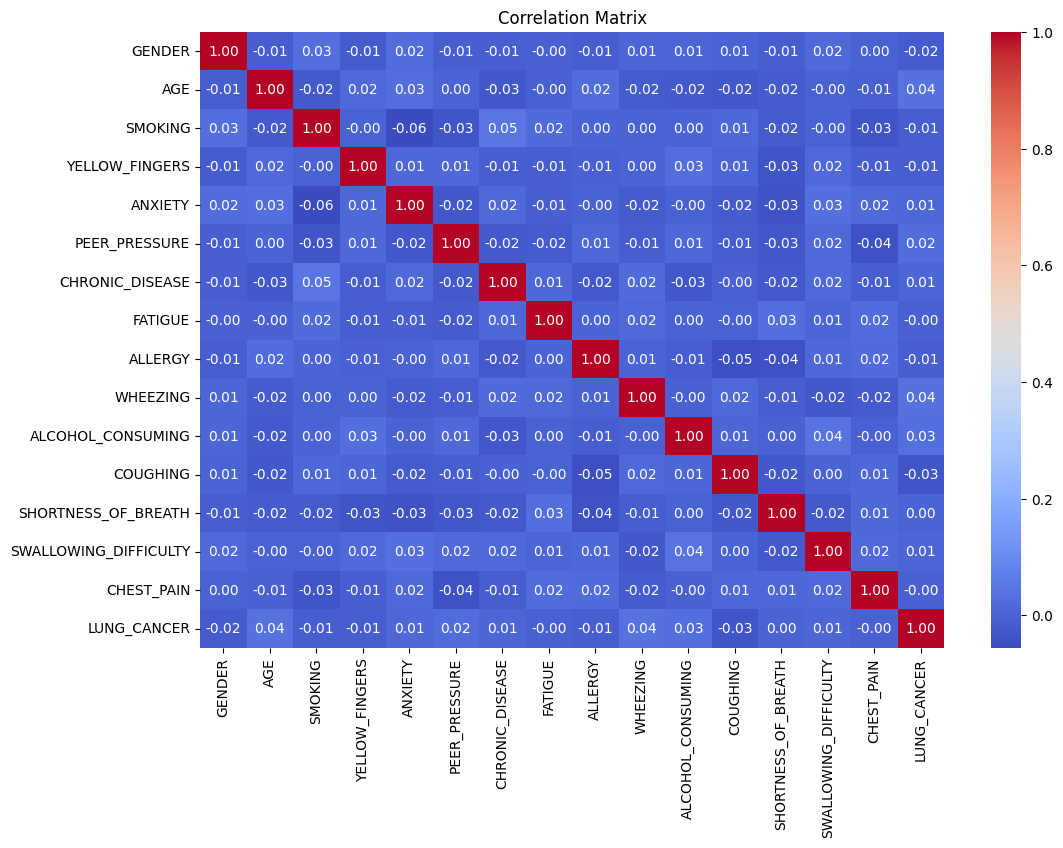

In [80]:
df['GENDER'] = df['GENDER'].map({'M':1, 'F': 2}) 
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES':1, 'NO': 2}) 
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()